In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score


import warnings

In [2]:
warnings.filterwarnings("ignore")
df = pd.read_excel("hackathon.xlsx")
df

,Math_test,Programming_Concepts_test,Communication_skills_test,Working_per_day,Logic_test,Hackathons,Gender,Introvert,Age,Public_speaker,Interested Type of Books,In a Realtionship?,Specialization
0,79,75,96,7.0,10.0,3.0,M,no,28,yes,Prayer books,no,Analysis&Management
1,66,76,72,14.0,NaN,NaN,F,yes,21,no,Childrens,yes,IT
2,89,88,70,6.0,3.0,2.0,M,no,21,yes,Travel,yes,IT
3,71,96,74,7.0,7.0,5.0,F,no,20,yes,Romance,yes,IT
4,62,62,77,7.0,1.0,1.0,M,yes,31,yes,Cookbooks,no,Design
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,81,88,80,4.0,5.0,0.0,F,no,20,yes,Journals,no,Design
19996,85,92,97,11.0,5.0,1.0,F,no,21,yes,Cookbooks,yes,Design
19997,71,76,83,9.0,5.0,2.0,M,no,21,no,Drama,yes,IT
19998,64,81,90,NaN,7.0,6.0,M,no,24,yes,Travel,yes,Design


In [3]:
df = df[df["Communication_skills_test"] != "unknow"]

In [4]:
df['Gender'] = df['Gender'].replace( ['F', 'M'], [0, 1])
df['Introvert'] = df['Introvert'].replace( ['no', 'yes'], [0, 1])
df['Public_speaker'] = df['Public_speaker'].replace( ['no', 'yes'], [0, 1])
df['In a Realtionship?'] = df['In a Realtionship?'].replace( ['no', 'yes'], [0, 1])

In [5]:
df

,Math_test,Programming_Concepts_test,Communication_skills_test,Working_per_day,Logic_test,Hackathons,Gender,Introvert,Age,Public_speaker,Interested Type of Books,In a Realtionship?,Specialization
0,79,75,96,7.0,10.0,3.0,1.0,0,28,1,Prayer books,0,Analysis&Management
1,66,76,72,14.0,NaN,NaN,0.0,1,21,0,Childrens,1,IT
2,89,88,70,6.0,3.0,2.0,1.0,0,21,1,Travel,1,IT
3,71,96,74,7.0,7.0,5.0,0.0,0,20,1,Romance,1,IT
4,62,62,77,7.0,1.0,1.0,1.0,1,31,1,Cookbooks,0,Design
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,81,88,80,4.0,5.0,0.0,0.0,0,20,1,Journals,0,Design
19996,85,92,97,11.0,5.0,1.0,0.0,0,21,1,Cookbooks,1,Design
19997,71,76,83,9.0,5.0,2.0,1.0,0,21,0,Drama,1,IT
19998,64,81,90,NaN,7.0,6.0,1.0,0,24,1,Travel,1,Design


In [6]:
df.isnull().sum()

Math_test                       0
Programming_Concepts_test       0
Communication_skills_test       0
Working_per_day              1990
Logic_test                   2009
Hackathons                   6646
Gender                       2029
Introvert                       0
Age                             0
Public_speaker                  0
Interested Type of Books        0
In a Realtionship?              0
Specialization                  0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Math_test,19999.0,77.105855,10.243136,59.0,68.0,77.0,86.0,97.0
Programming_Concepts_test,19999.0,77.210061,10.245678,59.0,68.0,77.0,86.0,97.0
Working_per_day,18009.0,8.375257,2.860076,3.0,6.0,8.0,11.0,14.0
Logic_test,17990.0,5.188160,2.765705,0.0,3.0,5.0,7.0,10.0
Hackathons,13353.0,2.984498,2.006277,0.0,1.0,3.0,5.0,6.0
Gender,17970.0,0.490818,0.499930,0.0,0.0,0.0,1.0,1.0
Introvert,19999.0,0.460523,0.498452,0.0,0.0,0.0,1.0,1.0
Age,19999.0,24.428171,3.780709,6.0,22.0,24.0,27.0,39.0
Public_speaker,19999.0,0.516326,0.499746,0.0,0.0,1.0,1.0,1.0
In a Realtionship?,19999.0,0.480574,0.499635,0.0,0.0,0.0,1.0,1.0


In [8]:
df.drop(columns=["Hackathons"], inplace=True)

In [9]:
df.isnull().sum()

Math_test                       0
Programming_Concepts_test       0
Communication_skills_test       0
Working_per_day              1990
Logic_test                   2009
Gender                       2029
Introvert                       0
Age                             0
Public_speaker                  0
Interested Type of Books        0
In a Realtionship?              0
Specialization                  0
dtype: int64

In [10]:
missed_columns = ["Working_per_day", "Logic_test", "Gender", "Interested Type of Books", "Specialization"]

missing_data = df[df["Working_per_day"].isnull()]
non_missing_data = df[df["Working_per_day"].notnull()]


X = non_missing_data.drop(missed_columns, axis=1)
y = non_missing_data["Working_per_day"]


# Create and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Use the trained model to predict missing values
X_missing = missing_data.drop(missed_columns, axis=1)
predicted_values = rf_model.predict(X_missing)

# Replace missing values with predicted values in the original DataFrame
df.loc[df["Working_per_day"].isnull(), "Working_per_day"] = predicted_values


In [11]:
df.isnull().sum()

Math_test                       0
Programming_Concepts_test       0
Communication_skills_test       0
Working_per_day                 0
Logic_test                   2009
Gender                       2029
Introvert                       0
Age                             0
Public_speaker                  0
Interested Type of Books        0
In a Realtionship?              0
Specialization                  0
dtype: int64

In [12]:
missed_columns = ["Working_per_day", "Logic_test", "Gender", "Interested Type of Books", "Specialization"]

missing_data = df[df["Logic_test"].isnull()]
non_missing_data = df[df["Logic_test"].notnull()]


X = non_missing_data.drop(missed_columns, axis=1)
y = non_missing_data["Logic_test"]


# Create and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Use the trained model to predict missing values
X_missing = missing_data.drop(missed_columns, axis=1)
predicted_values = rf_model.predict(X_missing)

# Replace missing values with predicted values in the original DataFrame
df.loc[df["Logic_test"].isnull(), "Logic_test"] = predicted_values


In [13]:
df.isnull().sum()

Math_test                       0
Programming_Concepts_test       0
Communication_skills_test       0
Working_per_day                 0
Logic_test                      0
Gender                       2029
Introvert                       0
Age                             0
Public_speaker                  0
Interested Type of Books        0
In a Realtionship?              0
Specialization                  0
dtype: int64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Math_test,19999.0,77.105855,10.243136,59.0,68.0,77.0,86.0,97.0
Programming_Concepts_test,19999.0,77.210061,10.245678,59.0,68.0,77.0,86.0,97.0
Working_per_day,19999.0,8.376564,2.739233,3.0,6.0,8.0,10.0,14.0
Logic_test,19999.0,5.183148,2.644382,0.0,3.0,5.0,7.0,10.0
Gender,17970.0,0.490818,0.499930,0.0,0.0,0.0,1.0,1.0
Introvert,19999.0,0.460523,0.498452,0.0,0.0,0.0,1.0,1.0
Age,19999.0,24.428171,3.780709,6.0,22.0,24.0,27.0,39.0
Public_speaker,19999.0,0.516326,0.499746,0.0,0.0,1.0,1.0,1.0
In a Realtionship?,19999.0,0.480574,0.499635,0.0,0.0,0.0,1.0,1.0


In [15]:
known_gender = df[df['Gender'].notna()]
missing_gender = df[df['Gender'].isna()]

clf = RandomForestClassifier()
clf.fit(known_gender.drop(['Gender', 'Specialization', 'Interested Type of Books'], axis=1), known_gender['Gender'])

predicted_gender = clf.predict(missing_gender.drop(['Gender', 'Specialization', 'Interested Type of Books'], axis=1))

# Assign predicted values to the missing gender rows
df.loc[df['Gender'].isna(), 'Gender'] = predicted_gender

In [16]:
df.isnull().sum()

Math_test                    0
Programming_Concepts_test    0
Communication_skills_test    0
Working_per_day              0
Logic_test                   0
Gender                       0
Introvert                    0
Age                          0
Public_speaker               0
Interested Type of Books     0
In a Realtionship?           0
Specialization               0
dtype: int64

In [17]:
df

,Math_test,Programming_Concepts_test,Communication_skills_test,Working_per_day,Logic_test,Gender,Introvert,Age,Public_speaker,Interested Type of Books,In a Realtionship?,Specialization
0,79,75,96,7.00,10.00,1.0,0,28,1,Prayer books,0,Analysis&Management
1,66,76,72,14.00,5.05,0.0,1,21,0,Childrens,1,IT
2,89,88,70,6.00,3.00,1.0,0,21,1,Travel,1,IT
3,71,96,74,7.00,7.00,0.0,0,20,1,Romance,1,IT
4,62,62,77,7.00,1.00,1.0,1,31,1,Cookbooks,0,Design
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,81,88,80,4.00,5.00,0.0,0,20,1,Journals,0,Design
19996,85,92,97,11.00,5.00,0.0,0,21,1,Cookbooks,1,Design
19997,71,76,83,9.00,5.00,1.0,0,21,0,Drama,1,IT
19998,64,81,90,9.94,7.00,1.0,0,24,1,Travel,1,Design


In [18]:
numeric_columns = df.select_dtypes(include=[np.number])

z_scores = np.abs(stats.zscore(numeric_columns))

threshold = 2.5

outlier_mask = z_scores > threshold

df = df[~outlier_mask.any(axis=1)]

outlier_counts = outlier_mask.sum(axis=0)
print("Number of outliers in each column:")
print(outlier_counts)


Number of outliers in each column:
Math_test                      0
Programming_Concepts_test      0
Working_per_day                0
Logic_test                     0
Gender                         0
Introvert                      0
Age                          210
Public_speaker                 0
In a Realtionship?             0
dtype: int64


In [19]:
df

,Math_test,Programming_Concepts_test,Communication_skills_test,Working_per_day,Logic_test,Gender,Introvert,Age,Public_speaker,Interested Type of Books,In a Realtionship?,Specialization
0,79,75,96,7.00,10.00,1.0,0,28,1,Prayer books,0,Analysis&Management
1,66,76,72,14.00,5.05,0.0,1,21,0,Childrens,1,IT
2,89,88,70,6.00,3.00,1.0,0,21,1,Travel,1,IT
3,71,96,74,7.00,7.00,0.0,0,20,1,Romance,1,IT
4,62,62,77,7.00,1.00,1.0,1,31,1,Cookbooks,0,Design
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,81,88,80,4.00,5.00,0.0,0,20,1,Journals,0,Design
19996,85,92,97,11.00,5.00,0.0,0,21,1,Cookbooks,1,Design
19997,71,76,83,9.00,5.00,1.0,0,21,0,Drama,1,IT
19998,64,81,90,9.94,7.00,1.0,0,24,1,Travel,1,Design


In [20]:
target_column = df["Specialization"]

label_encoder = LabelEncoder()

encoded_target = label_encoder.fit_transform(target_column)

df["Specialization"] = encoded_target

In [21]:
df.dtypes

Math_test                      int64
Programming_Concepts_test      int64
Communication_skills_test     object
Working_per_day              float64
Logic_test                   float64
Gender                       float64
Introvert                      int64
Age                            int64
Public_speaker                 int64
Interested Type of Books      object
In a Realtionship?             int64
Specialization                 int64
dtype: object

In [22]:
target = "Specialization"

X = df.drop([target,"Interested Type of Books" ], axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.80
Confusion Matrix:
[[1338  197  103]
 [ 184 1295   45]
 [ 155  110  531]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1638
           1       0.81      0.85      0.83      1524
           2       0.78      0.67      0.72       796

    accuracy                           0.80      3958
   macro avg       0.80      0.78      0.79      3958
weighted avg       0.80      0.80      0.80      3958



In [23]:
df.shape

(19789, 12)

In [24]:
df

,Math_test,Programming_Concepts_test,Communication_skills_test,Working_per_day,Logic_test,Gender,Introvert,Age,Public_speaker,Interested Type of Books,In a Realtionship?,Specialization
0,79,75,96,7.00,10.00,1.0,0,28,1,Prayer books,0,0
1,66,76,72,14.00,5.05,0.0,1,21,0,Childrens,1,2
2,89,88,70,6.00,3.00,1.0,0,21,1,Travel,1,2
3,71,96,74,7.00,7.00,0.0,0,20,1,Romance,1,2
4,62,62,77,7.00,1.00,1.0,1,31,1,Cookbooks,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,81,88,80,4.00,5.00,0.0,0,20,1,Journals,0,1
19996,85,92,97,11.00,5.00,0.0,0,21,1,Cookbooks,1,1
19997,71,76,83,9.00,5.00,1.0,0,21,0,Drama,1,2
19998,64,81,90,9.94,7.00,1.0,0,24,1,Travel,1,1


In [25]:
df_dummies = pd.get_dummies(df['Interested Type of Books'], prefix='BookType')

# Standardize the data (important for PCA)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_dummies)

n_components = 3 
pca = PCA(n_components=n_components)

# Fit the PCA model to your data
pca_data = pca.fit_transform(df_scaled)




pca_labels = pd.DataFrame(data=pca_data, columns=[f'PCA_{i+1}' for i in range(n_components)])

print(pca_labels.shape)
print(df.shape)

df = pd.concat([df, pca_labels], axis=1)

df.drop(columns=["Interested Type of Books"], inplace=True)
df.head()

(19789, 3)
(19789, 12)


,Math_test,Programming_Concepts_test,Communication_skills_test,Working_per_day,Logic_test,Gender,Introvert,Age,Public_speaker,In a Realtionship?,Specialization,PCA_1,PCA_2,PCA_3
0,79.0,75.0,96,7.0,10.00,1.0,0.0,28.0,1.0,0.0,0.0,-0.451957,0.045244,-1.128440
1,66.0,76.0,72,14.0,5.05,0.0,1.0,21.0,0.0,1.0,2.0,0.983925,0.104438,0.976364
2,89.0,88.0,70,6.0,3.00,1.0,0.0,21.0,1.0,1.0,2.0,-0.600007,0.648631,-0.306509
3,71.0,96.0,74,7.0,7.00,0.0,0.0,20.0,1.0,1.0,2.0,0.665865,0.593196,-0.864864
4,62.0,62.0,77,7.0,1.00,1.0,1.0,31.0,1.0,0.0,1.0,0.167058,0.103153,-0.790132


In [26]:
df.dropna(inplace=True)

In [27]:
df

,Math_test,Programming_Concepts_test,Communication_skills_test,Working_per_day,Logic_test,Gender,Introvert,Age,Public_speaker,In a Realtionship?,Specialization,PCA_1,PCA_2,PCA_3
0,79.0,75.0,96,7.0,10.00,1.0,0.0,28.0,1.0,0.0,0.0,-0.451957,0.045244,-1.128440
1,66.0,76.0,72,14.0,5.05,0.0,1.0,21.0,0.0,1.0,2.0,0.983925,0.104438,0.976364
2,89.0,88.0,70,6.0,3.00,1.0,0.0,21.0,1.0,1.0,2.0,-0.600007,0.648631,-0.306509
3,71.0,96.0,74,7.0,7.00,0.0,0.0,20.0,1.0,1.0,2.0,0.665865,0.593196,-0.864864
4,62.0,62.0,77,7.0,1.00,1.0,1.0,31.0,1.0,0.0,1.0,0.167058,0.103153,-0.790132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19784,61.0,74.0,102,9.0,8.00,1.0,1.0,25.0,1.0,1.0,0.0,0.150816,-0.181698,0.712290
19785,60.0,62.0,85,6.0,5.00,0.0,1.0,23.0,0.0,1.0,0.0,0.167058,0.103153,-0.790132
19786,81.0,76.0,74,8.0,7.00,1.0,0.0,29.0,0.0,0.0,0.0,0.128922,0.407632,1.911970
19787,92.0,78.0,73,9.0,2.00,0.0,1.0,25.0,0.0,1.0,1.0,-0.600007,0.648631,-0.306509


In [28]:
sub = df[["Math_test", "Programming_Concepts_test", "Communication_skills_test", "Working_per_day", "Logic_test"]]
sub = pd.DataFrame(sub)
kmeans = KMeans(n_clusters=3).fit(sub)   
df['labels'] = kmeans.labels_

da = df.groupby(by=['labels']).mean()
da = da.reset_index()
da = dict( zip( da['labels'], da['Specialization'] ) )
print(da)
file_path = "labels_weight.json"
# with open(file_path, "w") as json_file:
#     json.dump(da, json_file)

df['labels'] = df['labels'].map(da)
# with open('kmeans_model.pkl', 'wb') as model_file:
#     pickle.dump(kmeans, model_file)

print(df['labels'].corr(df['Specialization']))

{0: 0.5310364067512903, 1: 0.9889987244897959, 2: 0.9152680462766825}
0.2742203886527355


In [29]:
target = "Specialization"

X = df.drop([target,], axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.81
Confusion Matrix:
[[1345  187   86]
 [ 194 1282   57]
 [ 142   89  534]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82      1618
         1.0       0.82      0.84      0.83      1533
         2.0       0.79      0.70      0.74       765

    accuracy                           0.81      3916
   macro avg       0.80      0.79      0.80      3916
weighted avg       0.81      0.81      0.81      3916



In [30]:
df['Communication_skills_test'] = pd.to_numeric(df['Communication_skills_test'], errors='coerce')

In [31]:
df.dtypes

Math_test                    float64
Programming_Concepts_test    float64
Communication_skills_test      int64
Working_per_day              float64
Logic_test                   float64
Gender                       float64
Introvert                    float64
Age                          float64
Public_speaker               float64
In a Realtionship?           float64
Specialization               float64
PCA_1                        float64
PCA_2                        float64
PCA_3                        float64
labels                       float64
dtype: object

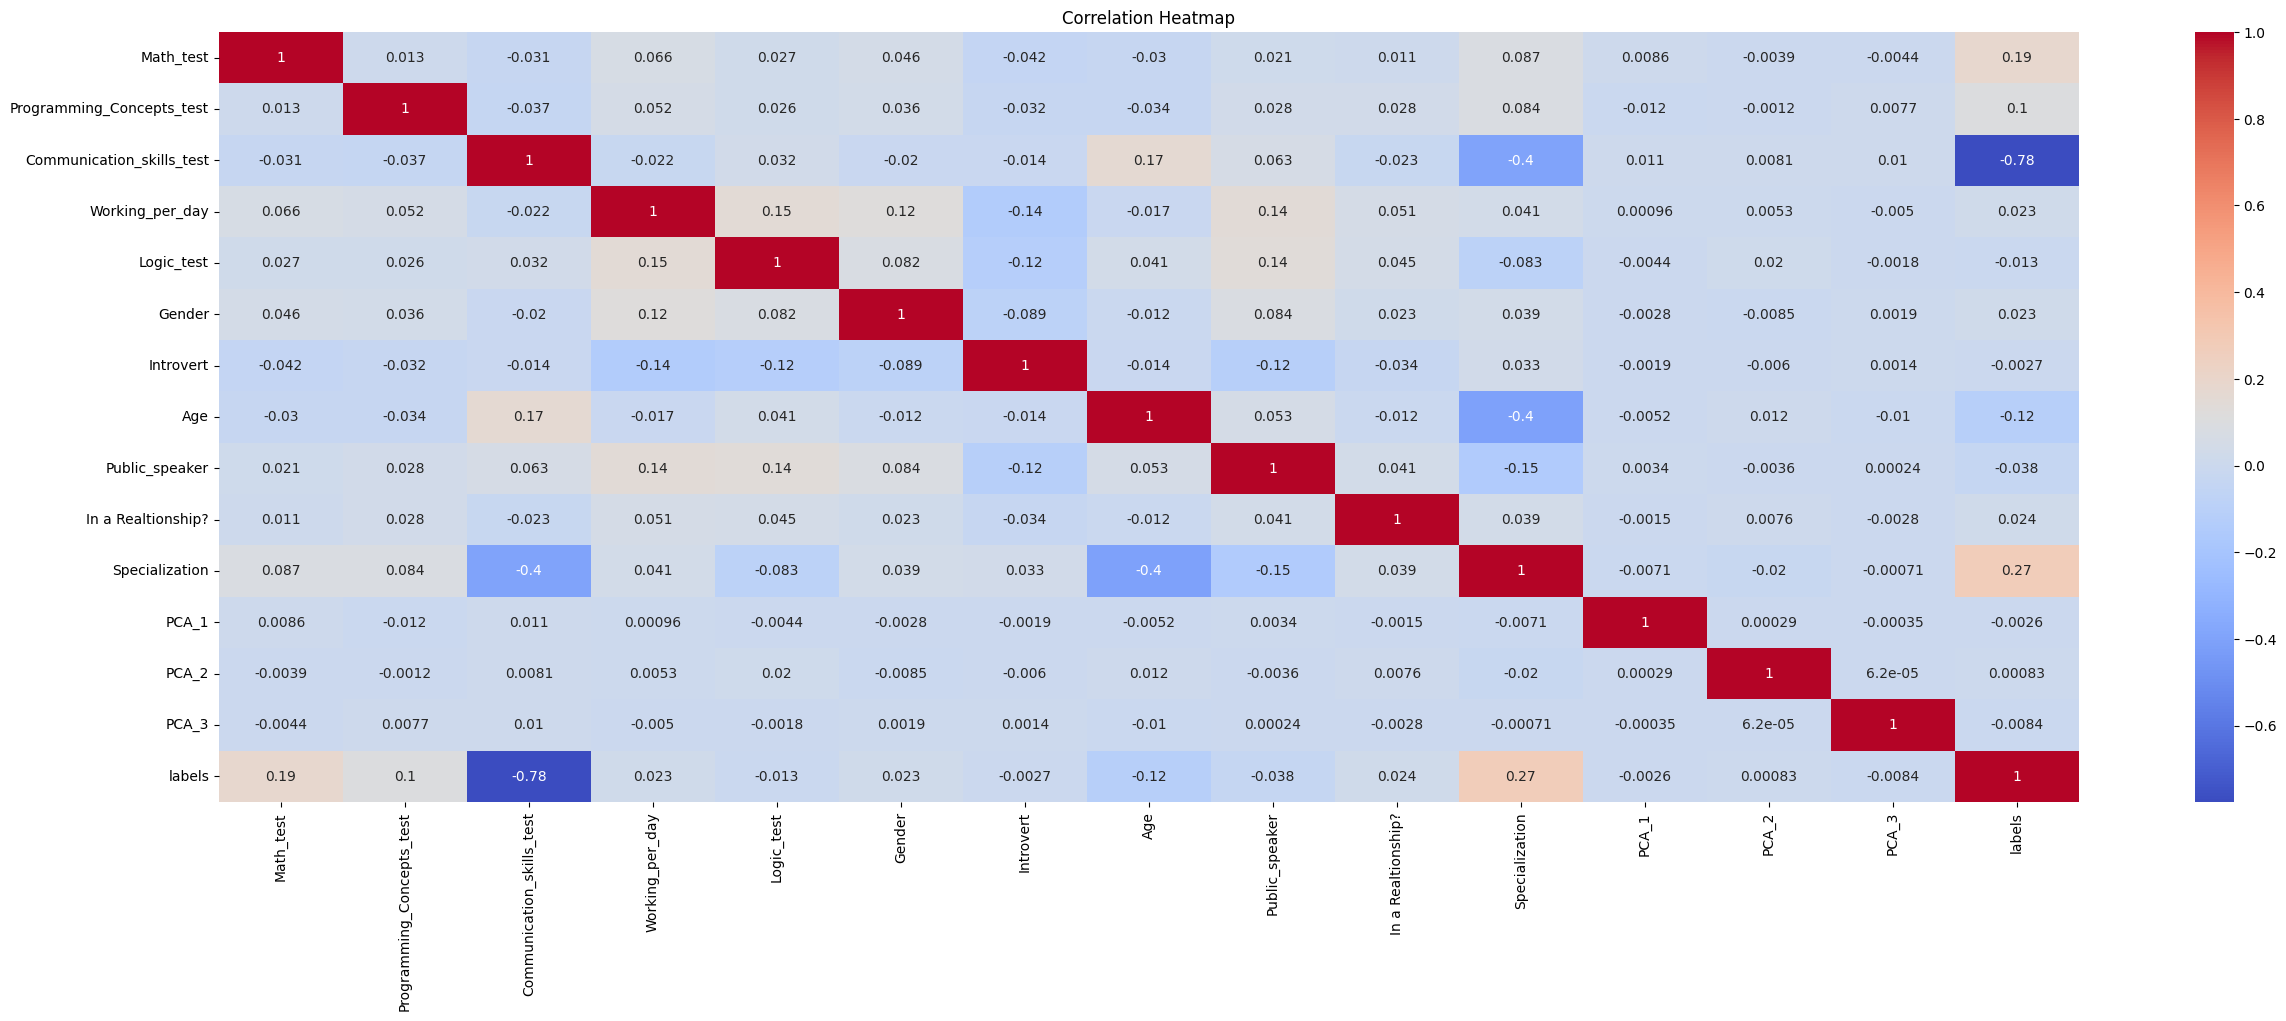

In [32]:
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(30, 10))  # Set the size of the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set labels and title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()


<Axes: >

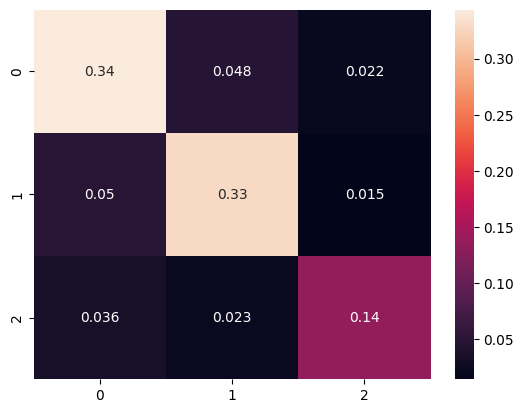

In [33]:

sns.heatmap(confusion/np.sum(confusion),  annot = True)

In [34]:
df

,Math_test,Programming_Concepts_test,Communication_skills_test,Working_per_day,Logic_test,Gender,Introvert,Age,Public_speaker,In a Realtionship?,Specialization,PCA_1,PCA_2,PCA_3,labels
0,79.0,75.0,96,7.0,10.00,1.0,0.0,28.0,1.0,0.0,0.0,-0.451957,0.045244,-1.128440,0.531036
1,66.0,76.0,72,14.0,5.05,0.0,1.0,21.0,0.0,1.0,2.0,0.983925,0.104438,0.976364,0.915268
2,89.0,88.0,70,6.0,3.00,1.0,0.0,21.0,1.0,1.0,2.0,-0.600007,0.648631,-0.306509,0.988999
3,71.0,96.0,74,7.0,7.00,0.0,0.0,20.0,1.0,1.0,2.0,0.665865,0.593196,-0.864864,0.915268
4,62.0,62.0,77,7.0,1.00,1.0,1.0,31.0,1.0,0.0,1.0,0.167058,0.103153,-0.790132,0.915268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19784,61.0,74.0,102,9.0,8.00,1.0,1.0,25.0,1.0,1.0,0.0,0.150816,-0.181698,0.712290,0.531036
19785,60.0,62.0,85,6.0,5.00,0.0,1.0,23.0,0.0,1.0,0.0,0.167058,0.103153,-0.790132,0.915268
19786,81.0,76.0,74,8.0,7.00,1.0,0.0,29.0,0.0,0.0,0.0,0.128922,0.407632,1.911970,0.988999
19787,92.0,78.0,73,9.0,2.00,0.0,1.0,25.0,0.0,1.0,1.0,-0.600007,0.648631,-0.306509,0.988999


In [35]:
df.dtypes

Math_test                    float64
Programming_Concepts_test    float64
Communication_skills_test      int64
Working_per_day              float64
Logic_test                   float64
Gender                       float64
Introvert                    float64
Age                          float64
Public_speaker               float64
In a Realtionship?           float64
Specialization               float64
PCA_1                        float64
PCA_2                        float64
PCA_3                        float64
labels                       float64
dtype: object

In [36]:
target = "Specialization"

X = df.drop([target], axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.81
Confusion Matrix:
[[1345  187   86]
 [ 194 1282   57]
 [ 142   89  534]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82      1618
         1.0       0.82      0.84      0.83      1533
         2.0       0.79      0.70      0.74       765

    accuracy                           0.81      3916
   macro avg       0.80      0.79      0.80      3916
weighted avg       0.81      0.81      0.81      3916

